In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# test

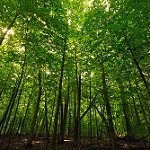

In [2]:
image = Image.open("forest_678.jpg")
image

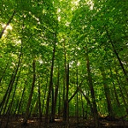

In [3]:
image = image.resize((128, 128))
image

In [8]:
image_arr = np.array(image)
height, width, channel = image_arr.shape
height, width, channel

(128, 128, 3)

In [17]:
line_width = 3
height_repeat = 4
width_repeat = 5

In [18]:
new_height = height * height_repeat + line_width * (height_repeat - 1)
new_width = width * width_repeat + line_width * (width_repeat - 1)
new_height, new_width

(521, 652)

In [19]:
palette = np.zeros((new_height, new_width, channel), dtype=np.uint8)
palette.shape

(521, 652, 3)

In [20]:
height + line_width, height

(131, 128)

In [21]:
width + line_width, width

(131, 128)

In [29]:
for i in range(height_repeat):
    for j in range(width_repeat):
        height_1 = i * (height + line_width)
        height_2 = i * (height + line_width) + height
        width_1 = j * (width + line_width)
        width_2 = j * (width + line_width) + width
        print(f"height: {height_1}:{height_2}, width: {width_1}:{width_2}")
        palette[height_1:height_2, width_1:width_2] = image_arr
    print("-" * 50)

height: 0:128, width: 0:128
height: 0:128, width: 131:259
height: 0:128, width: 262:390
height: 0:128, width: 393:521
height: 0:128, width: 524:652
--------------------------------------------------
height: 131:259, width: 0:128
height: 131:259, width: 131:259
height: 131:259, width: 262:390
height: 131:259, width: 393:521
height: 131:259, width: 524:652
--------------------------------------------------
height: 262:390, width: 0:128
height: 262:390, width: 131:259
height: 262:390, width: 262:390
height: 262:390, width: 393:521
height: 262:390, width: 524:652
--------------------------------------------------
height: 393:521, width: 0:128
height: 393:521, width: 131:259
height: 393:521, width: 262:390
height: 393:521, width: 393:521
height: 393:521, width: 524:652
--------------------------------------------------


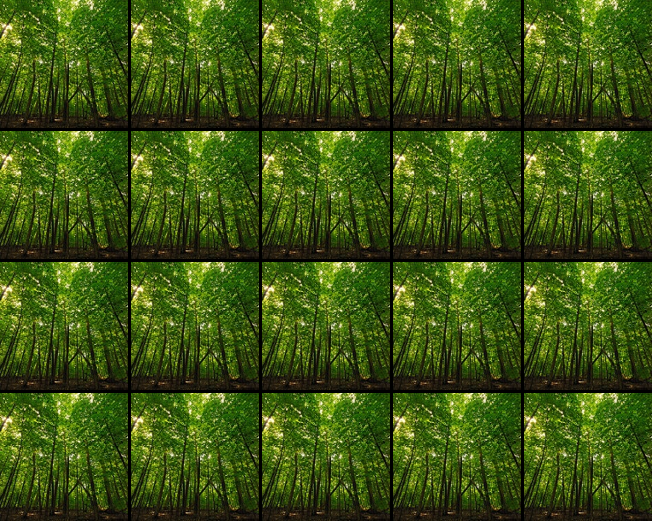

In [25]:
Image.fromarray(palette)

# func

In [9]:
def draw_mulit_images_in_one(
    images: list[np.ndarray], width_repeat: int = 5, line_width: int = 3
) -> np.ndarray:
    """将多张图片绘制到一张图片

    Args:
        images (list[np.ndarray]):    绘制的图片列表,所有图片大小相同
        width_repeat (int, optional): x轴重复次数. Defaults to 5.
        line_width (int, optional):   图片之间的线宽. Defaults to 3.

    Returns:
        np.ndarray: 绘制的图片
    """
    import math

    height_repeat = math.ceil(len(images) / width_repeat)

    height, width, channel = images[0].shape
    # new image
    new_height = height * height_repeat + line_width * (height_repeat - 1)
    new_width = width * width_repeat + line_width * (width_repeat - 1)
    palette = np.zeros((new_height, new_width, channel), dtype=np.uint8)

    for i, image in enumerate(images):
        height_index = math.floor(i / width_repeat)  # h index
        width_index = i % width_repeat  # w index

        # x y 坐标
        height_1 = height_index * (height + line_width)
        height_2 = height_index * (height + line_width) + height
        width_1 = width_index * (width + line_width)
        width_2 = width_index * (width + line_width) + width

        palette[height_1:height_2, width_1:width_2] = image

    return palette

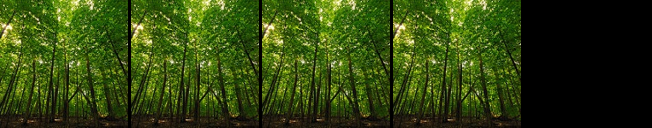

In [10]:
Image.fromarray(draw_mulit_images_in_one([image_arr] * 4))

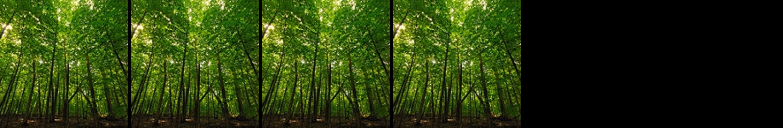

In [11]:
Image.fromarray(draw_mulit_images_in_one([image_arr] * 4, width_repeat=6))

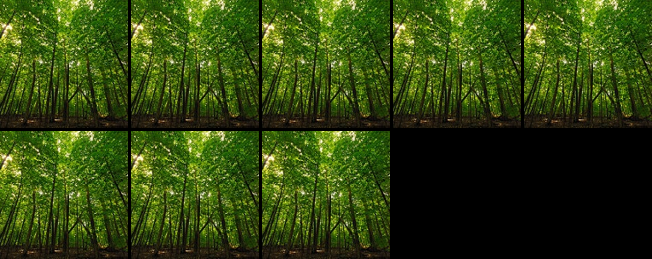

In [12]:
Image.fromarray(draw_mulit_images_in_one([image_arr] * 8))

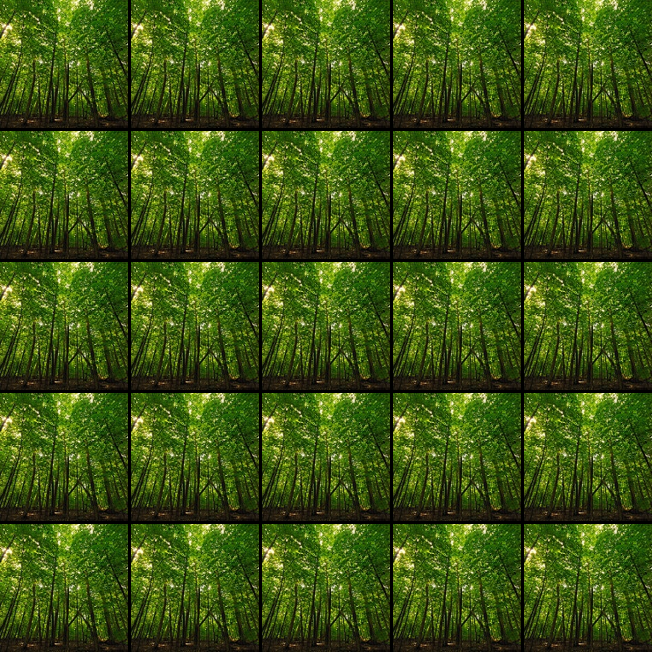

In [13]:
Image.fromarray(draw_mulit_images_in_one([image_arr] * 25))